# Segmentation by using depth image

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

# threshold = 0.3
def find_outline(depth_image, threshold):
    outline = []
    ii = 1
    while ii < len(depth_image) - 1:
        jj = 1
        while jj < len(depth_image[ii]) - 1:
            if (((depth_image[ii-1][jj] < threshold) or (depth_image[ii][jj-1] < threshold) or (depth_image[ii+1][jj] < threshold) or (depth_image[ii][jj+1] < threshold)) and (depth_image[ii][jj] > threshold)):
                outline.append([ii, jj])
            jj += 1
        ii += 1
    return outline

depth_image = plt.imread('depth_image.png')
threshold = 0.3
outline = find_outline(depth_image, threshold)

# Segmentation by using color image (Mask-RCNN)

In [ ]:
!python3 mask_rcnn.py --image=color_image.png

# Compare

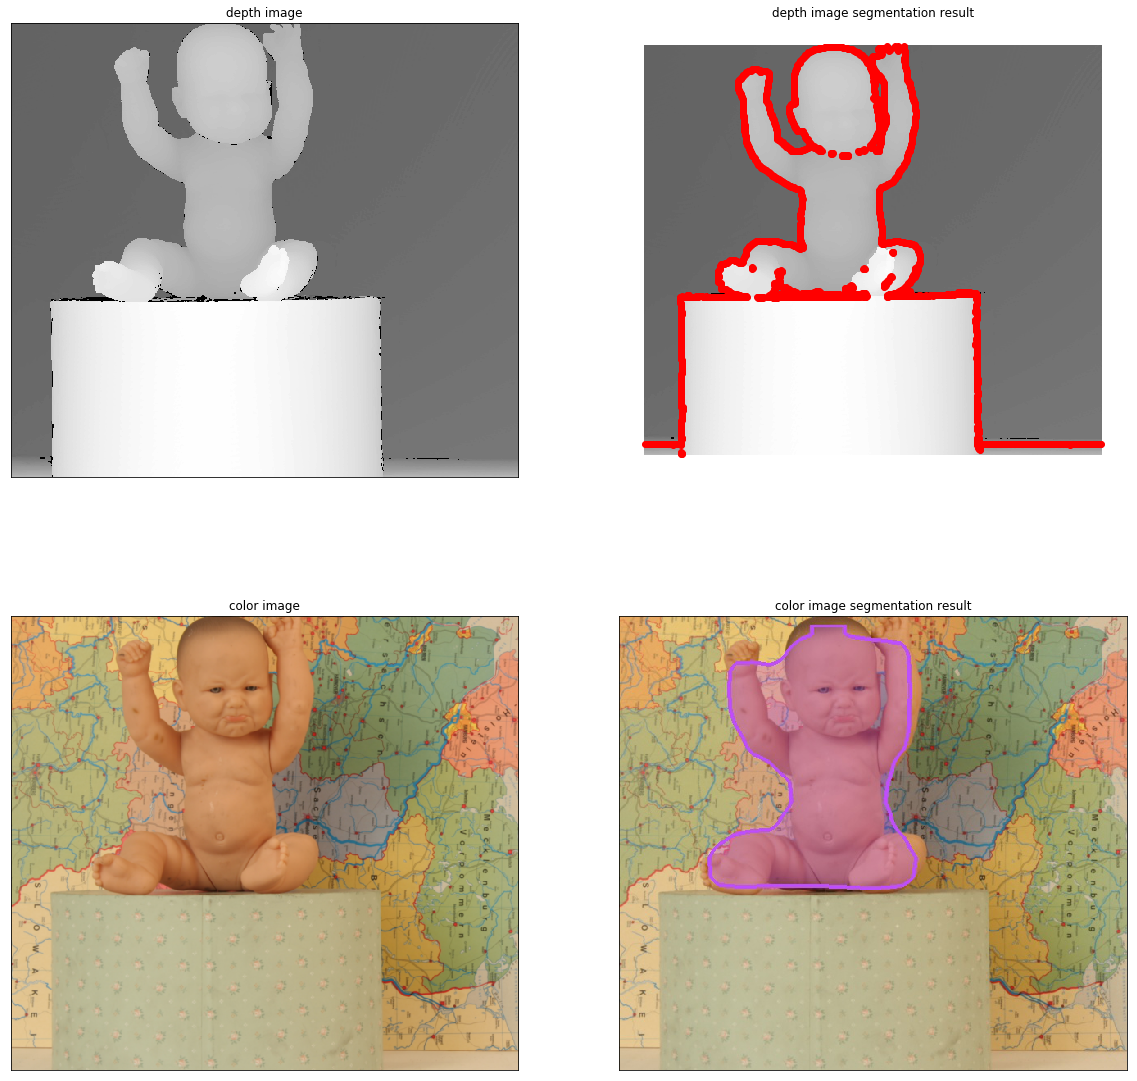

In [8]:
depth_image = plt.imread('depth_image.png')
figure, axs = plt.subplots(2, 2)
figure.set_size_inches(20, 20, forward= True)
axs[0][0].set_xticks([])
axs[0][1].set_xticks([])
axs[0][0].set_yticks([])
axs[0][1].set_yticks([])
axs[1][0].set_xticks([])
axs[1][1].set_xticks([])
axs[1][0].set_yticks([])
axs[1][1].set_yticks([])
axs[0][0].imshow(depth_image, cmap = 'gray')
axs[0][1].imshow(depth_image, cmap = 'gray')
axs[0][0].set_title('depth image')
axs[0][1].set_title('depth image segmentation result')

color_image = plt.imread('color_image.png')
axs[1][0].imshow(color_image)
segmentation_by_color_image = plt.imread('color_image_mask_rcnn_out_py.jpg')
axs[1][1].imshow(segmentation_by_color_image)
axs[1][0].set_title('color image')
axs[1][1].set_title('color image segmentation result')

i = 0
while i < len(outline):
    axs[0][1].scatter(outline[i][1], outline[i][0], linewidth = 1, color = 'red')
    i += 1

axs[0][1].spines['top'].set_visible(False)
axs[0][1].spines['right'].set_visible(False)
axs[0][1].spines['bottom'].set_visible(False)
axs[0][1].spines['left'].set_visible(False)

# Conclusion

From the above demonstration, we can see that segmentation result **is not perfect in some area when using color image**, while **result is very good in those area when using depth image**. Therefore, combining depth and color image to enhance instance segmentation is **feasible**.